In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import plotly.graph_objects as go

plt.rcParams['figure.figsize'] = (12,6)
plt.style.use('fivethirtyeight')

import warnings
warnings.filterwarnings("ignore")


In [2]:
import os
print(os.listdir('data'))

['datafile (1).csv', 'datafile (2).csv', 'datafile (3).csv', 'datafile.csv', 'produce.csv', 'Project4_Ag_Prediction of Agriculture Crop Production In India.docx']


In [3]:
#Load the data using pandas read functions
data1 = pd.read_csv('data/datafile (1).csv')
data2 = pd.read_csv('data/datafile (2).csv')
data3 = pd.read_csv('data/datafile (3).csv')
datafile = pd.read_csv('data/datafile.csv')
produce = pd.read_csv('data/produce.csv')

In [4]:
data1 = data1.rename(columns={
    'Crop': 'Crop',
    'State': 'State',
    'Cost of Cultivation (`/Hectare) A2+FL': 'Cost_A2_FL',
    'Cost of Cultivation (`/Hectare) C2': 'Cost_C2',
    'Cost of Production (`/Quintal) C2': 'Cost_Production',
    'Yield (Quintal/ Hectare) ': 'Yield'
})

data1.head()


Crop           State  Cost_A2_FL   Cost_C2  Cost_Production  Yield
0  ARHAR   Uttar Pradesh     9794.05  23076.74          1941.55   9.83
1  ARHAR       Karnataka    10593.15  16528.68          2172.46   7.47
2  ARHAR         Gujarat    13468.82  19551.90          1898.30   9.59
3  ARHAR  Andhra Pradesh    17051.66  24171.65          3670.54   6.42
4  ARHAR     Maharashtra    17130.55  25270.26          2775.80   8.72

In [5]:
#check the shape of the data
print(f' The dataset contains {data1.shape[1]} columns and {data1.shape[0]} rows')

 The dataset contains 6 columns and 49 rows


In [6]:
# Print the column names
print(data1.columns)

Index(['Crop', 'State', 'Cost_A2_FL', 'Cost_C2', 'Cost_Production', 'Yield'], dtype='object')


In [7]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Crop             49 non-null     object 
 1   State            49 non-null     object 
 2   Cost_A2_FL       49 non-null     float64
 3   Cost_C2          49 non-null     float64
 4   Cost_Production  49 non-null     float64
 5   Yield            49 non-null     float64
dtypes: float64(4), object(2)
memory usage: 2.4+ KB


In [8]:
data1.isnull().sum().sum()

0

In [9]:
#checking the null values in the data
data1.isna().sum()/len(data1)*100

Crop               0.0
State              0.0
Cost_A2_FL         0.0
Cost_C2            0.0
Cost_Production    0.0
Yield              0.0
dtype: float64

In [10]:
data1.fillna(0, inplace=True)

In [11]:
#Lets check the duplicate values in the data
print('The duplicate values in the data is', data1.duplicated().sum())

The duplicate values in the data is 0


In [12]:
#Check the statistics in the data1
data1.describe()

Cost_A2_FL       Cost_C2  Cost_Production        Yield
count     49.000000     49.000000        49.000000    49.000000
mean   20363.537347  31364.666735      1620.537755    98.086735
std    13561.435306  20095.783569      1104.990472   245.293123
min     5483.540000   7868.640000        85.790000     1.320000
25%    12774.410000  19259.840000       732.620000     9.590000
50%    17022.000000  25909.050000      1595.560000    13.700000
75%    24731.060000  35423.480000      2228.970000    36.610000
max    66335.060000  91442.630000      5777.480000  1015.450000

In [13]:
import plotly.express as px

# Color palette for the histograms
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

# EDA - Histogram
column_names = ['Cost_A2_FL', 'Cost_C2', 'Cost_Production', 'Yield']

for i, column in enumerate(column_names):
    fig = px.histogram(data1, x=column, nbins=10, marginal='box',
                       labels={column: column})
    fig.update_layout(title=f'Histogram of {column}', xaxis_title=column, yaxis_title='Count',
                      plot_bgcolor='rgba(0,0,0,0)', paper_bgcolor='rgba(0,0,0,0)',
                      font=dict(size=12))
    fig.update_traces(marker_color=colors[i % len(colors)])
    fig.show()


<Figure size 800x600 with 0 Axes>

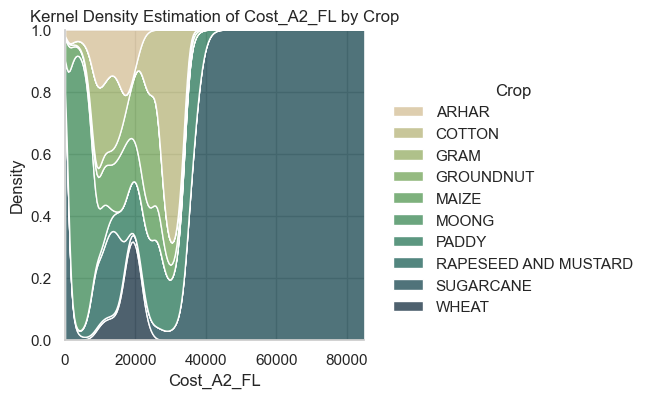

<Figure size 800x600 with 0 Axes>

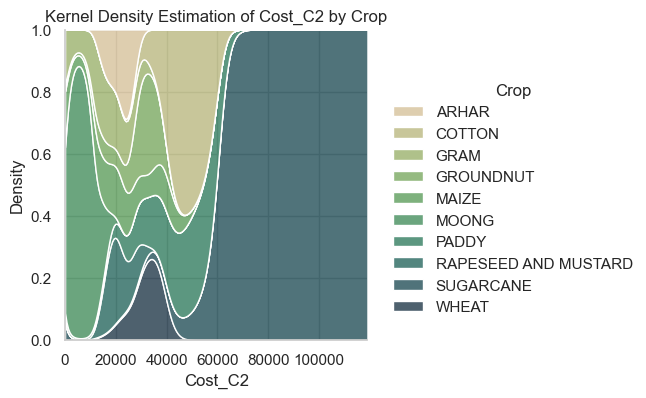

<Figure size 800x600 with 0 Axes>

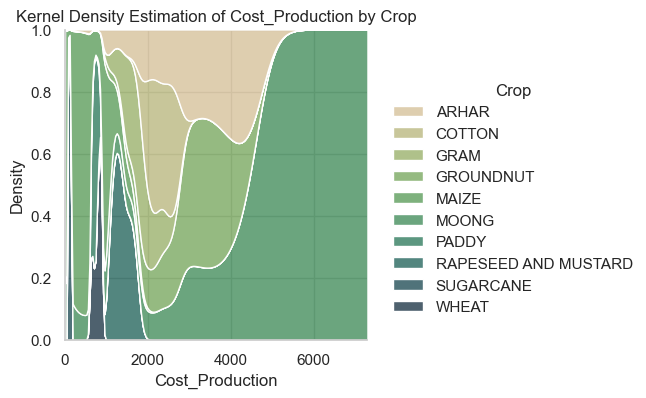

<Figure size 800x600 with 0 Axes>

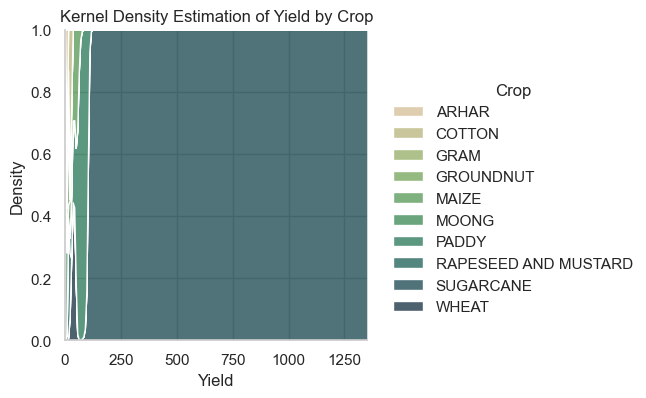

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")

# Plotting 'Cost_A2_FL'
plt.figure(figsize=(8, 6))
sns.displot(data=data1, x='Cost_A2_FL', hue="Crop", kind="kde", height=4, multiple="fill", clip=(0, None), palette="ch:rot=-.75,hue=1,light=.75")
plt.title('Kernel Density Estimation of Cost_A2_FL by Crop')
plt.xlabel('Cost_A2_FL')
plt.ylabel('Density')
plt.show()

# Plotting 'Cost_C2'
plt.figure(figsize=(8, 6))
sns.displot(data=data1, x='Cost_C2', hue="Crop", kind="kde", height=4, multiple="fill", clip=(0, None), palette="ch:rot=-.75,hue=1,light=.75")
plt.title('Kernel Density Estimation of Cost_C2 by Crop')
plt.xlabel('Cost_C2')
plt.ylabel('Density')
plt.show()

# Plotting 'Cost_Production'
plt.figure(figsize=(8, 6))
sns.displot(data=data1, x='Cost_Production', hue="Crop", kind="kde", height=4, multiple="fill", clip=(0, None), palette="ch:rot=-.75,hue=1,light=.75")
plt.title('Kernel Density Estimation of Cost_Production by Crop')
plt.xlabel('Cost_Production')
plt.ylabel('Density')
plt.show()

# Plotting 'Yield'
plt.figure(figsize=(8, 6))
sns.displot(data=data1, x='Yield', hue="Crop", kind="kde", height=4, multiple="fill", clip=(0, None), palette="ch:rot=-.75,hue=1,light=.75")
plt.title('Kernel Density Estimation of Yield by Crop')
plt.xlabel('Yield')
plt.ylabel('Density')
plt.show()


<AxesSubplot:>

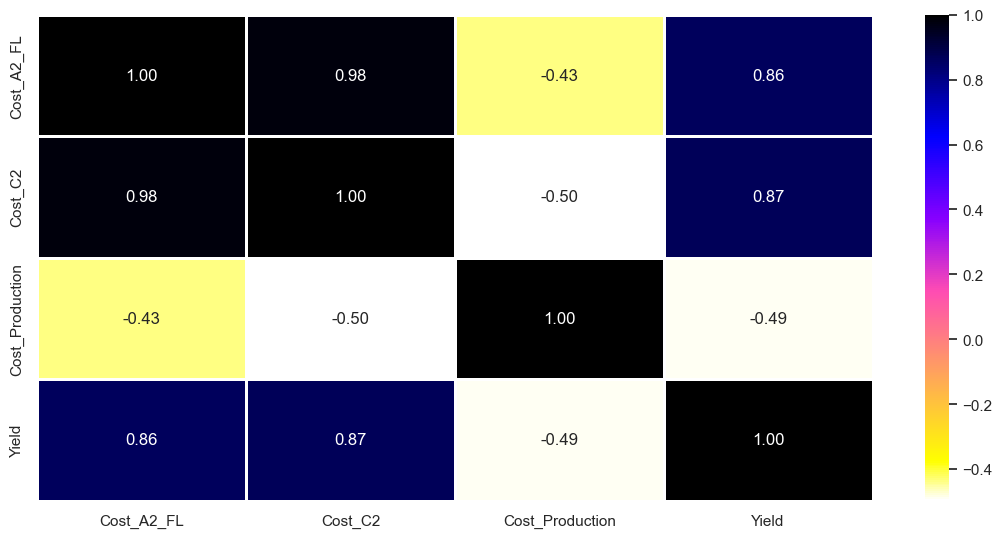

In [15]:
#check the correlation map
sns.heatmap(data1.corr(),annot=True,cmap='gnuplot2_r',fmt='.2f',linewidths=1)

In [16]:
# What are the unique states in the data?
states_in_data = data1['State'].unique()
print('\n The states in the data:', states_in_data)

dominant_state = data1['State'].value_counts().idxmax()
print('\n The Dominant state:', dominant_state)

less_dominant_state = data1['State'].value_counts().idxmin()
print('\n The Less Dominant State:', less_dominant_state)

max_and_min_yield = (data1['Yield'].min(), data1['Yield'].max())
print('\nThe Minimum yield range:', max_and_min_yield)

most_demand_crop = data1['Crop'].value_counts().idxmax()
print('\nThe most demanded crop in the data:', most_demand_crop)

less_demand_crop = data1['Crop'].value_counts().idxmax()
print('\nThe less demanded crop in the data:', less_demand_crop)



 The states in the data: ['Uttar Pradesh' 'Karnataka' 'Gujarat' 'Andhra Pradesh' 'Maharashtra'
 'Punjab' 'Haryana' 'Rajasthan' 'Madhya Pradesh' 'Tamil Nadu' 'Bihar'
 'Orissa' 'West Bengal']

 The Dominant state: Andhra Pradesh

 The Less Dominant State: Bihar

The Minimum yield range: (1.32, 1015.45)

The most demanded crop in the data: ARHAR

The less demanded crop in the data: ARHAR


In [17]:
# Find the Average yield of the top 10 yield in the data
avg_yield = data1.groupby('Yield')['Cost_A2_FL','Cost_C2','Cost_Production'].mean()
avg_yield.head(10)


Cost_A2_FL   Cost_C2  Cost_Production
Yield                                       
1.32      6440.64   7868.64          5777.48
3.01      5483.54   8266.98          2614.14
4.05      6204.23   9165.59          2068.67
4.71     13647.10  17314.20          3484.01
5.90      6684.18  13209.32          2228.97
6.42     17051.66  24171.65          3670.54
6.70     10780.76  15371.45          2261.24
6.83      8552.69  12610.85          1691.66
7.47     10593.15  16528.68          2172.46
8.05     12985.95  18679.33          2277.68

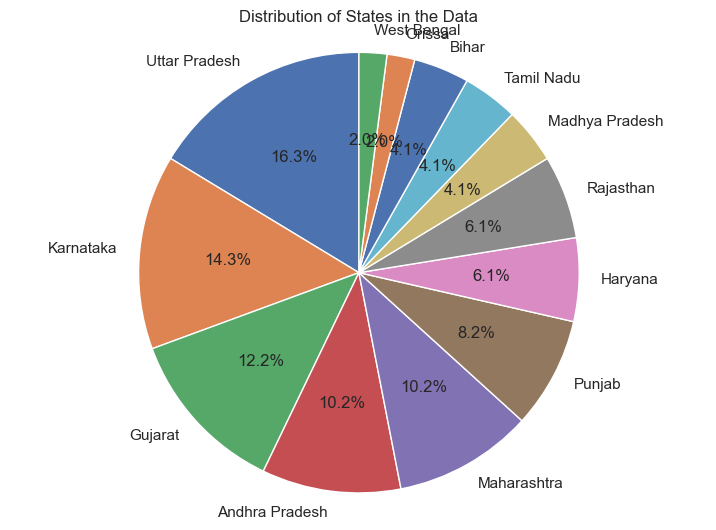

In [18]:
import matplotlib.pyplot as plt

# What are the unique states in the data
states_in_data = data1['State'].unique()

# Calculate the counts of each unique state
state_counts = data1['State'].value_counts()

# Plot a pie chart for the state counts
plt.figure(figsize=(8, 6))
plt.pie(state_counts, labels=states_in_data, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of States in the Data')
plt.axis('equal')
plt.show()


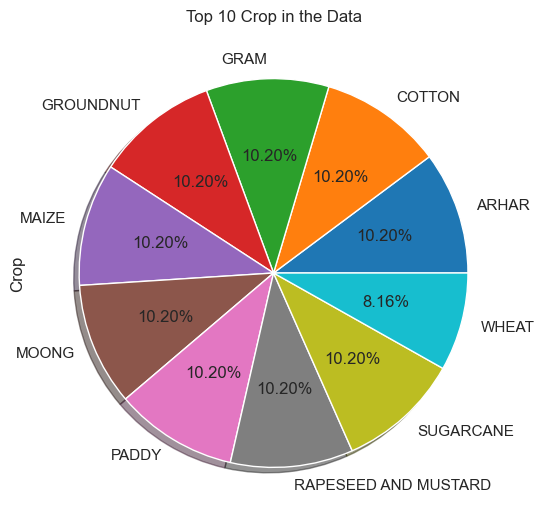

In [19]:
#create a pie chart to visualize the top 10 crop in the data
color = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
          '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

label = ['ARHAR', 'COTTON', 'GRAM', 'GROUNDNUT', 'MAIZE', 'MOONG', 'PADDY', 'RAPESEED AND MUSTARD', 'SUGARCANE', 'WHEAT']

data1['Crop'].value_counts().sort_values(ascending=False).head(10)\
.plot(kind = 'pie',labels=label, colors=color,
      autopct ='%1.2f%%',
      shadow=True)
plt.title('Top 10 Crop in the Data')
plt.show()

In [20]:
# Get the list of unique state 
state_list = data1['State'].unique()

# Print the state list
print("List of State:")
for state in state_list:
    print(state)

List of State:
Uttar Pradesh
Karnataka
Gujarat
Andhra Pradesh
Maharashtra
Punjab
Haryana
Rajasthan
Madhya Pradesh
Tamil Nadu
Bihar
Orissa
West Bengal


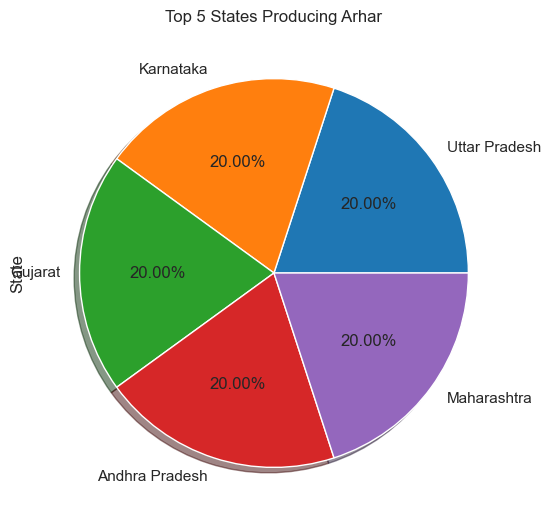

In [21]:
#create a pie chart to visualization arhar produced by the states
arhar = data1[data1['Crop']=='ARHAR']
label = ['Uttar Pradesh','Karnataka','Gujarat','Andhra Pradesh',
         'Maharashtra','Punjab','Haryana','Rajasthan','Madhya Pradesh',
         'Tamil Nadu','Bihar','Orissa','West Bengal']
arhar['State'].value_counts().head(10).sort_values(ascending=False)\
    .plot(kind='pie', labels=label,
          colors=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
          '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'],
          autopct='%1.2f%%',
          shadow=True)
plt.title("Top 5 States Producing Arhar")
plt.show()


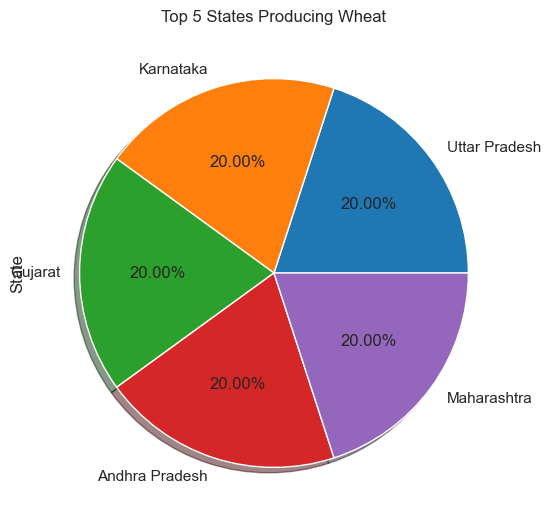

In [22]:
#create a pie chart to visualization wheat produced by the states
wheat = data1[data1['Crop']=='WHEAT']
label = ['Uttar Pradesh','Karnataka','Gujarat','Andhra Pradesh',
         'Maharashtra','Punjab','Haryana','Rajasthan','Madhya Pradesh',
         'Tamil Nadu','Bihar','Orissa','West Bengal']
arhar['State'].value_counts().head(10).sort_values(ascending=False)\
    .plot(kind='pie', labels=label,
          colors=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
          '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'],
          autopct='%1.2f%%',
          shadow=True)
plt.title("Top 5 States Producing Wheat")
plt.show()


In [23]:
# Find the Top 10 Minimum and Maximum values of the crop 
crop_stats = data1.groupby('Crop')[['Cost_A2_FL', 'Cost_C2', 'Cost_Production']].agg(['min', 'max'])
crop_stats.head(10)


Cost_A2_FL             Cost_C2           Cost_Production  \
                            min       max       min       max             min   
Crop                                                                            
ARHAR                   9794.05  17130.55  16528.68  25270.26         1898.30   
COTTON                 23711.44  29918.97  33116.82  50828.83         2003.76   
GRAM                    8552.69  14421.98  12610.85  26762.09         1551.94   
GROUNDNUT              13647.10  26078.66  17314.20  32683.46         1918.92   
MAIZE                  13513.92  25687.09  19810.29  37801.85          404.43   
MOONG                   5483.54  10780.76   7868.64  15371.45         2068.67   
PADDY                  17022.00  29664.84  25909.05  46450.20          669.86   
RAPESEED AND MUSTARD    8686.43  14715.27  17705.93  27507.54         1251.12   
SUGARCANE              24538.32  66335.06  45239.51  91442.63           85.79   
WHEAT                  12464.40  19119.08  22489.75  35423.48          683.58   

                               
                          max  
Crop                           
ARHAR                 3670.54  
COTTON                2539.47  
GRAM                  2277.68  
GROUNDNUT             3484.01  
MAIZE                 1387.36  
MOONG                 5777.48  
PADDY                  789.90  
RAPESEED AND MUSTARD  1610.40  
SUGARCANE              119.72  
WHEAT                  810.25

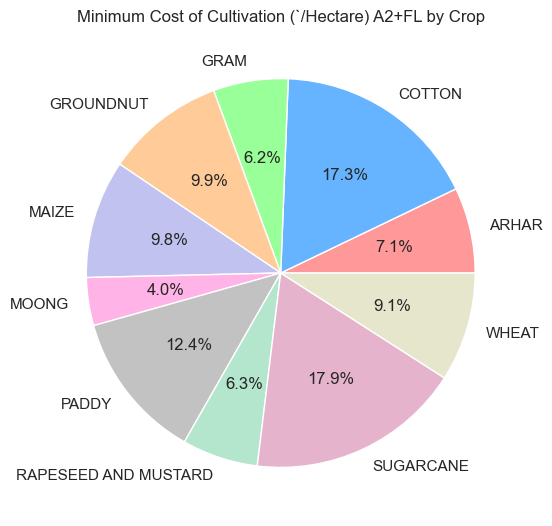

In [24]:
import matplotlib.pyplot as plt

# Data
crop_data = {
    'Crop': ['ARHAR', 'COTTON', 'GRAM', 'GROUNDNUT', 'MAIZE', 'MOONG', 'PADDY', 'RAPESEED AND MUSTARD', 'SUGARCANE', 'WHEAT'],
    'min_Cost_A2_FL': [9794.05, 23711.44, 8552.69, 13647.1, 13513.92, 5483.54, 17022.0, 8686.43, 24538.32, 12464.4],
    'max_Cost_A2_FL': [17130.55, 29918.97, 14421.98, 26078.66, 25687.09, 10780.76, 29664.84, 14715.27, 66335.06, 19119.08],
    'min_Cost_C2': [16528.68, 33116.82, 12610.85, 17314.2, 19810.29, 7868.64, 25909.05, 17705.93, 45239.51, 22489.75],
    'max_Cost_C2': [25270.26, 50828.83, 26762.09, 32683.46, 37801.85, 15371.45, 46450.2, 27507.54, 91442.63, 35423.48],
    'min_Cost_Production': [1898.3, 2003.76, 1551.94, 1918.92, 404.43, 2068.67, 669.86, 1251.12, 85.79, 683.58],
    'max_Cost_Production': [3670.54, 2539.47, 2277.68, 3484.01, 1387.36, 5777.48, 789.9, 1610.4, 119.72, 810.25]
}

# Convert data to a DataFrame
crop_df = pd.DataFrame(crop_data)

# Set Crop column as the index
crop_df.set_index('Crop', inplace=True)

# Plotting
fig, ax = plt.subplots(figsize=(8, 6))
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0', '#ffb3e6', '#c2c2c2', '#b3e6cc', '#e6b3cc', '#e6e6cc']

# Plotting pie chart for min_Cost_A2_FL= Cost of Cultivation (`/Hectare) A2+FL
ax.pie(crop_df['min_Cost_A2_FL'], labels=crop_df.index, autopct='%1.1f%%', colors=colors)
ax.set_title('Minimum Cost of Cultivation (`/Hectare) A2+FL by Crop')

plt.show()


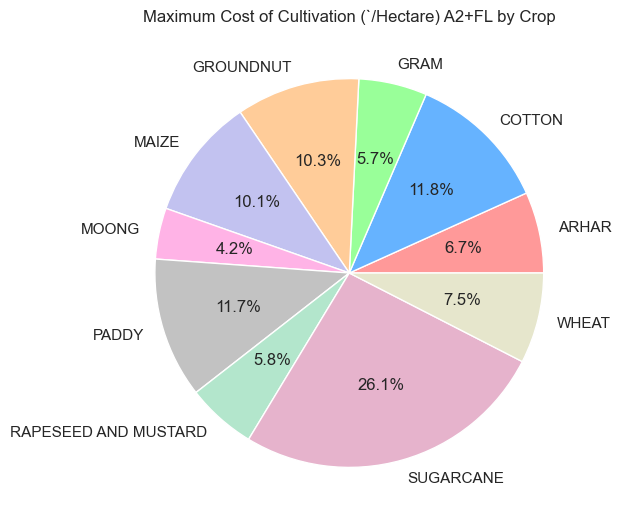

In [25]:
# Plotting
fig, ax = plt.subplots(figsize=(8, 6))
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0', '#ffb3e6', '#c2c2c2', '#b3e6cc', '#e6b3cc', '#e6e6cc']

# Plotting pie chart for max_Cost_A2_FL= Cost of Cultivation (`/Hectare) A2+FL
ax.pie(crop_df['max_Cost_A2_FL'], labels=crop_df.index, autopct='%1.1f%%', colors=colors)
ax.set_title('Maximum Cost of Cultivation (`/Hectare) A2+FL by Crop')

plt.show()


In [26]:
# Define colors for each pie slice
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0', '#ffb3e6', '#c2c2c2', '#b3e6cc', '#e6b3cc', '#e6e6cc']

# Create the pie chart
fig = go.Figure(data=[go.Pie(labels=crop_df.index, values=crop_df['min_Cost_C2'], hole=0.3, textinfo='label+percent', marker=dict(colors=colors))])
fig.update_layout(title='Minimum Cost of Cultivation (`/Hectare) C2 by Crop')

# Show the pie chart
fig.show()

In [27]:
import plotly.graph_objects as go

# Define colors for each pie slice
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0', '#ffb3e6', '#c2c2c2', '#b3e6cc', '#e6b3cc', '#e6e6cc']

# Create the pie chart
fig = go.Figure(data=[go.Pie(labels=crop_df.index, values=crop_df['max_Cost_C2'], hole=0.3, textinfo='label+percent', marker=dict(colors=colors))])
fig.update_layout(title='Maximum Cost of Cultivation (`/Hectare) C2 by Crop')

# Show the pie chart
fig.show()


In [28]:
import plotly.graph_objects as go

# Create the sunburst chart
fig = go.Figure(go.Sunburst(
    labels=crop_df.index,
    parents=[''] * len(crop_df.index),
    values=crop_df['min_Cost_Production'],
    branchvalues='total',
    hovertemplate='<b>%{label}</b><br>Value: %{value}<br>Percentage: %{percentRoot:.1%}',
))

fig.update_traces(textinfo='label+percent root')
fig.update_layout(
    title='Minimum Cost Production by Crop',
    sunburstcolorway=['#FF9999', '#66B3FF', '#99FF99', '#FFCC99', '#C2C2F0', '#FFB3E6', '#C2C2C2', '#B3E6CC', '#E6B3CC', '#E6E6CC'],
)

# Show the sunburst chart
fig.show()


In [29]:
# Create the sunburst chart
fig = go.Figure(go.Sunburst(
    labels=crop_df.index,
    parents=[''] * len(crop_df.index),
    values=crop_df['max_Cost_Production'],
    branchvalues='total',
    hovertemplate='<b>%{label}</b><br>Value: %{value}<br>Percentage: %{percentRoot:.1%}',
))

fig.update_traces(textinfo='label+percent root')
fig.update_layout(
    title='Maximum Cost Production by Crop',
    sunburstcolorway=['#FF9999', '#66B3FF', '#99FF99', '#FFCC99', '#C2C2F0', '#FFB3E6', '#C2C2C2', '#B3E6CC', '#E6B3CC', '#E6E6CC'],
)

# Show the sunburst chart
fig.show()

In [30]:
# Find the crop with the minimum cost of production
crop_min_cost = data1[data1['Cost_Production'] == data1['Cost_Production'].min()]['Crop']
crop_min_cost

44    SUGARCANE
Name: Crop, dtype: object

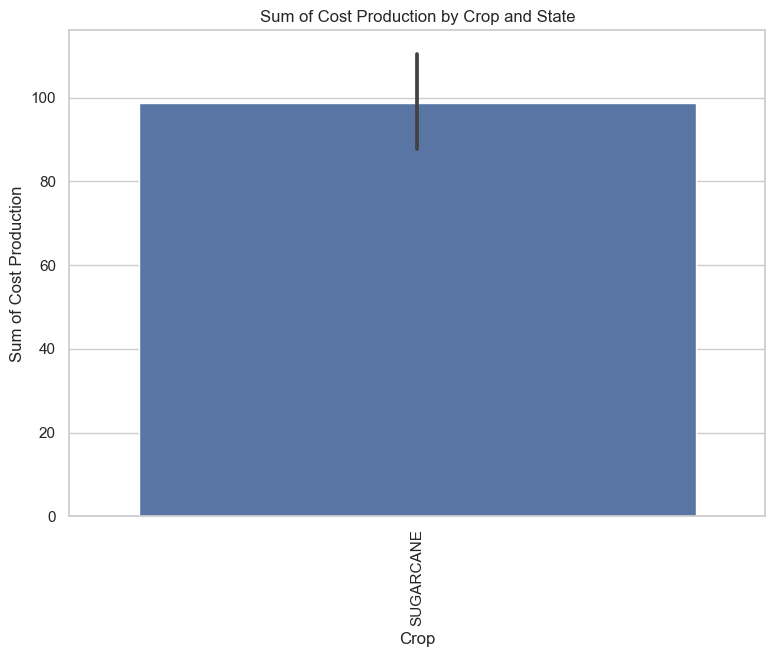

In [31]:
# Find the crop with the minimum cost of production
crop_min_cost = data1[data1['Crop'] == 'SUGARCANE'].groupby(['State', 'Crop'])['Cost_Production'].sum()

plt.figure(figsize=(8, 6))
sns.barplot(x=crop_min_cost.index.get_level_values('Crop'), y=crop_min_cost.values)
plt.xlabel('Crop')
plt.ylabel('Sum of Cost Production')
plt.title('Sum of Cost Production by Crop and State')
plt.xticks(rotation=90)
plt.show()


In [32]:
# Find the crop with the maximum cost of production
crop_max_cost = data1[data1['Cost_Production'] == data1['Cost_Production'].max()]['Crop']
crop_max_cost

27    MOONG
Name: Crop, dtype: object

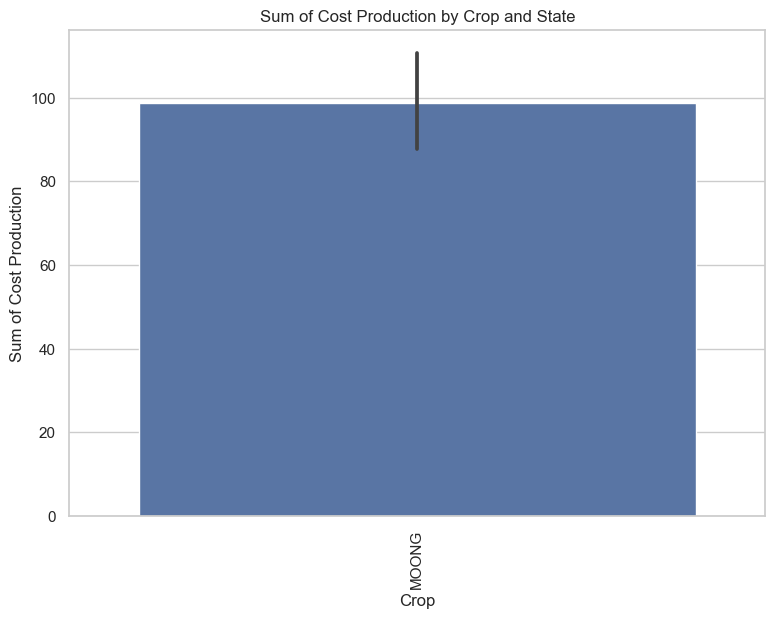

In [33]:
# Find the crop with the minimum cost of production
crop_max_cost = data1[data1['Crop'] == 'MOONG'].groupby(['State', 'Crop'])['Cost_Production'].sum()

plt.figure(figsize=(8, 6))
sns.barplot(x=crop_max_cost.index.get_level_values('Crop'), y=crop_min_cost.values)
plt.xlabel('Crop')
plt.ylabel('Sum of Cost Production')
plt.title('Sum of Cost Production by Crop and State')
plt.xticks(rotation=90)
plt.show()


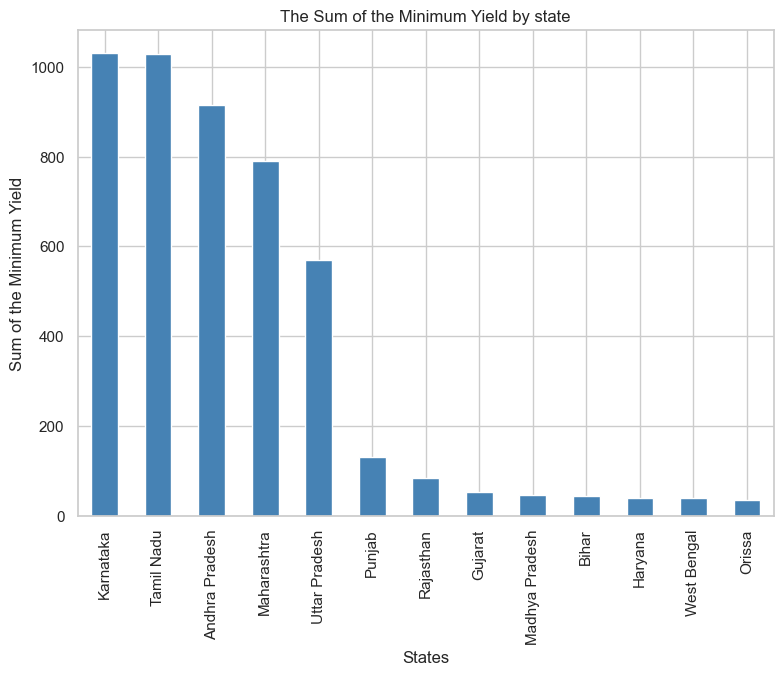

In [34]:
import matplotlib.pyplot as plt
# Create a bar chart to understand which states have the highest minimum yield
data1.groupby('State')['Yield'].sum().sort_values(ascending=False).plot(kind='bar', title="The Sum of the Minimum Yield by state", figsize=(8, 6), color='steelblue')
plt.xlabel("States")
plt.ylabel("Sum of the Minimum Yield")
plt.show()


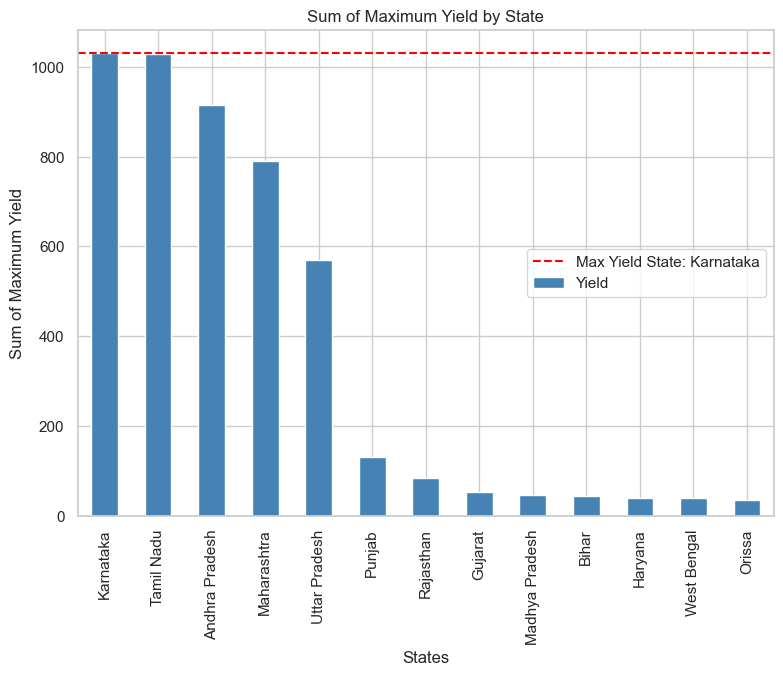

In [35]:
# Calculate the sum of maximum yield for each state
state_yield_sum = data1.groupby('State')['Yield'].sum()

# Find the state with the maximum sum of maximum yield
max_yield_state = state_yield_sum.idxmax()

# Create a bar chart to visualize the sum of maximum yield for each state
state_yield_sum.sort_values(ascending=False).plot(kind='bar', title="Sum of Maximum Yield by State", figsize=(8, 6), color='steelblue')

# Highlight the state with the maximum sum of minimum yield
plt.axhline(y=state_yield_sum[max_yield_state], color='red', linestyle='--', label=f'Max Yield State: {max_yield_state}')

plt.xlabel("States")
plt.ylabel("Sum of Maximum Yield")
plt.legend()
plt.show()


In [36]:
# Count the number of unique crop types
num_crops = data1['Crop'].nunique()

# Print the result
print("Number of unique crop types:", num_crops)


Number of unique crop types: 10


In [37]:
# Get the list of unique crop types
crop_list = data1['Crop'].unique()

# Print the crop list
print("List of crop types:")
for crop in crop_list:
    print(crop)


List of crop types:
ARHAR
COTTON
GRAM
GROUNDNUT
MAIZE
MOONG
PADDY
RAPESEED AND MUSTARD
SUGARCANE
WHEAT


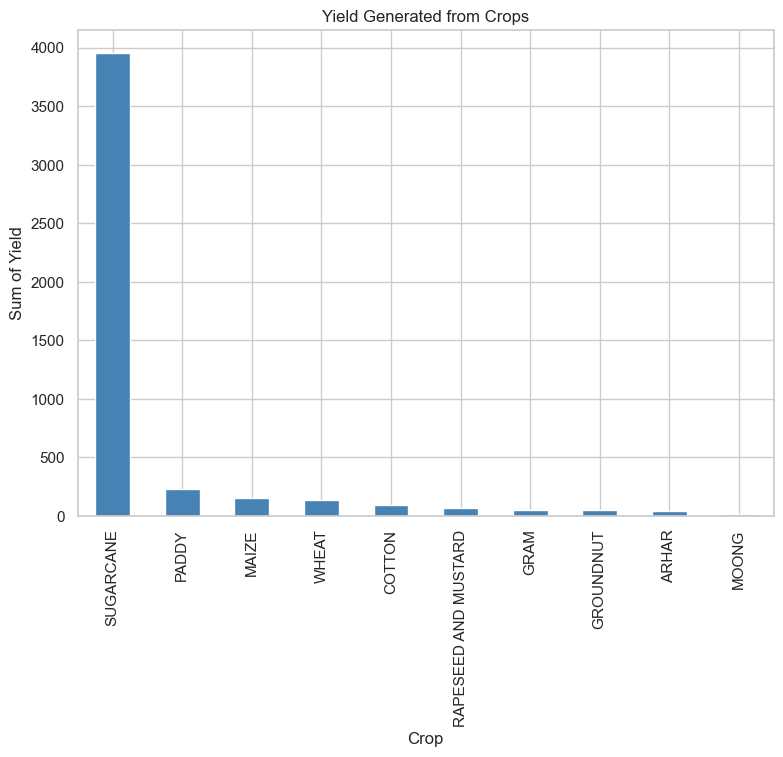

In [38]:
# List of crop types to plot
crop_types = ['ARHAR', 'COTTON', 'GRAM', 'GROUNDNUT', 'MAIZE', 'MOONG', 'PADDY', 'RAPESEED AND MUSTARD', 'SUGARCANE', 'WHEAT']

# Filter data for the selected crop types
filtered_data = data1[data1['Crop'].isin(crop_types)]

# Create a bar chart to find the yield generated from the selected crops
filtered_data.groupby('Crop')['Yield'].sum().sort_values(ascending=False).plot(kind='bar', title='Yield Generated from Crops', figsize=(8, 6), color='steelblue')
plt.xlabel("Crop")
plt.ylabel("Sum of Yield")
plt.show()


In [39]:
# Calculate average values
avg_cost_production = data1['Cost_Production'].mean()
avg_yield = data1['Yield'].mean()

# Create a bar plot using plotly
fig = go.Figure()

fig.add_trace(go.Bar(
    x=data1['State'],
    y=data1['Cost_Production'],
    name='Cost of Production',
    marker_color='royalblue'
))

fig.add_trace(go.Bar(
    x=data1['State'],
    y=data1['Yield'],
    name='Yield',
    marker_color='limegreen'
))

fig.add_trace(go.Scatter(
    x=data1['State'],
    y=[avg_cost_production] * len(data1),
    mode='lines',
    name='Average Cost of Production',
    line=dict(color='red', dash='dash')
))

fig.add_trace(go.Scatter(
    x=data1['State'],
    y=[avg_yield] * len(data1),
    mode='lines',
    name='Average Yield',
    line=dict(color='orange', dash='dash')
))

fig.update_layout(
    title='Cost of Production and Yield by State',
    xaxis_title='State',
    yaxis_title='Value',
    barmode='group',
    legend=dict(x=0, y=1.0, bgcolor='rgba(255, 255, 255, 0.5)', bordercolor='black', borderwidth=1)
)

fig.show()


In [40]:
data2.head()

Crop               Production 2006-07  Production 2007-08  \
0  Total Foodgrains               158.8               168.6   
1              Rice               200.8               207.9   
2             Wheat               131.6               136.4   
3             Jowar               124.3               137.8   
4             Bajra               136.4               161.5   

   Production 2008-09  Production 2009-10  Production 2010-11  Area 2006-07  \
0               171.3               159.4               178.9         128.5   
1               213.3               191.6               206.4         168.5   
2               140.1               140.3               150.8         115.0   
3               126.0               116.5               121.8         120.7   
4               143.9               105.4               167.9          94.5   

   Area 2007-08  Area 2008-09  Area 2009-10  Area 2010-11  Yield 2006-07  \
0         128.8         127.6         126.0         131.7          123.6   
1         168.9         175.1         161.2         164.8          119.2   
2         115.2         114.0         116.9         119.5          114.4   
3         110.6         107.3         111.0         105.2          103.0   
4          95.1          87.0          88.5          95.6          144.3   

   Yield 2007-08  Yield 2008-09  Yield 2009-10  Yield 2010-11  
0          130.9          134.3          126.5          135.9  
1          123.1          121.8          118.9          125.2  
2          118.4          122.8          120.0          126.3  
3          124.6          117.4          105.0          115.8  
4          169.7          165.4          119.0          175.8

In [41]:
# Print the column names
print(data2.columns)

Index(['Crop             ', 'Production 2006-07', 'Production 2007-08',
       'Production 2008-09', 'Production 2009-10', 'Production 2010-11',
       'Area 2006-07', 'Area 2007-08', 'Area 2008-09', 'Area 2009-10',
       'Area 2010-11', 'Yield 2006-07', 'Yield 2007-08', 'Yield 2008-09',
       'Yield 2009-10', 'Yield 2010-11'],
      dtype='object')


In [42]:
import plotly.graph_objects as go
import pandas as pd

# Create a trace for each crop
traces = []
for crop in data2['Crop             ']:
    trace = go.Scatter(x=data2.columns[1:], y=data2[data2['Crop             '] == crop].values.flatten()[1:], mode='lines+markers', name=crop)
    traces.append(trace)

# Create the layout
layout = go.Layout(
    title='Crop Production and Yield',
    xaxis=dict(title='Year'),
    yaxis=dict(title='Quantity'),
    legend=dict(x=0, y=1)
)

# Create the figure
fig = go.Figure(data=traces, layout=layout)

# Show the figure
fig.show()


In [44]:
data3 = pd.read_csv('data/datafile (2).csv')
data3.head()

Crop               Production 2006-07  Production 2007-08  \
0  Total Foodgrains               158.8               168.6   
1              Rice               200.8               207.9   
2             Wheat               131.6               136.4   
3             Jowar               124.3               137.8   
4             Bajra               136.4               161.5   

   Production 2008-09  Production 2009-10  Production 2010-11  Area 2006-07  \
0               171.3               159.4               178.9         128.5   
1               213.3               191.6               206.4         168.5   
2               140.1               140.3               150.8         115.0   
3               126.0               116.5               121.8         120.7   
4               143.9               105.4               167.9          94.5   

   Area 2007-08  Area 2008-09  Area 2009-10  Area 2010-11  Yield 2006-07  \
0         128.8         127.6         126.0         131.7          123.6   
1         168.9         175.1         161.2         164.8          119.2   
2         115.2         114.0         116.9         119.5          114.4   
3         110.6         107.3         111.0         105.2          103.0   
4          95.1          87.0          88.5          95.6          144.3   

   Yield 2007-08  Yield 2008-09  Yield 2009-10  Yield 2010-11  
0          130.9          134.3          126.5          135.9  
1          123.1          121.8          118.9          125.2  
2          118.4          122.8          120.0          126.3  
3          124.6          117.4          105.0          115.8  
4          169.7          165.4          119.0          175.8

In [45]:
# Print the column names
print(data3.columns)

Index(['Crop             ', 'Production 2006-07', 'Production 2007-08',
       'Production 2008-09', 'Production 2009-10', 'Production 2010-11',
       'Area 2006-07', 'Area 2007-08', 'Area 2008-09', 'Area 2009-10',
       'Area 2010-11', 'Yield 2006-07', 'Yield 2007-08', 'Yield 2008-09',
       'Yield 2009-10', 'Yield 2010-11'],
      dtype='object')


In [46]:
# Define the crops and corresponding colors
crops = ['Total Foodgrains', 'Rice', 'Wheat', 'Jowar', 'Bajra']
colors = ['steelblue', 'royalblue', 'cornflowerblue', 'lightskyblue', 'lightblue']

# Create the traces for each crop
traces = []
for i, crop in enumerate(crops):
    trace = go.Bar(
        x=data3.columns[1:],
        y=data3.loc[data3['Crop             '] == crop, data3.columns[1:]].values.flatten(),
        name=crop,
        marker=dict(color=colors[i])
    )
    traces.append(trace)

# Create the layout
layout = go.Layout(
    title='Crop Production and Yield',
    xaxis=dict(title='Year'),
    yaxis=dict(title='Quantity'),
    barmode='group'
)

# Create the figure
fig = go.Figure(data=traces, layout=layout)

# Show the figure
fig.show()

In [47]:
datafile = pd.read_csv('data/datafile.csv')
datafile.head()

Crop  2004-05  2005-06  2006-07  2007-08  2008-09  2009-10  \
0            Rice    100.0    101.0     99.0    105.0    112.0    121.0   
1           Wheat    100.0    101.0    112.0    115.0    117.0    127.0   
2  Coarse Cereals    100.0    107.0    110.0    115.0    113.0    123.0   
3          Pulses    100.0    108.0    134.0    124.0    124.0    146.0   
4     Vegetables     100.0    109.0    103.0    118.0    113.0    124.0   

   2010-11  2011-12  
0    117.0    110.0  
1    120.0    108.0  
2    122.0    136.0  
3    137.0    129.0  
4    128.0    115.0

In [48]:
# Print the column names
print(datafile.columns)

Index(['Crop', '2004-05', '2005-06', '2006-07', '2007-08', '2008-09',
       '2009-10', '2010-11', '2011-12'],
      dtype='object')


In [49]:
datafile.isnull().sum().sum()

9

In [50]:
datafile.fillna(0, inplace=True)

In [51]:
#Lets check the duplicate values in the data
print('The duplicate values in the datafile is', datafile.duplicated().sum())

The duplicate values in the datafile is 0


In [52]:
import plotly.graph_objects as go
import pandas as pd

# Define the crops and corresponding colors
crops = ['Rice', 'Wheat', 'Coarse Cereals', 'Pulses', 'Vegetables']
colors = ['steelblue', 'royalblue', 'cornflowerblue', 'lightskyblue', 'lightblue']

# Create the traces for each crop
traces = []
for i, crop in enumerate(crops):
    trace = go.Scatter(
        x=datafile.columns[1:],
        y=datafile.loc[datafile['Crop'] == crop, datafile.columns[1:]].values.flatten(),
        mode='lines+markers',
        name=crop,
        line=dict(color=colors[i])
    )
    traces.append(trace)

# Create the layout
layout = go.Layout(
    title='Crop Growth Over Time',
    xaxis=dict(title='Year'),
    yaxis=dict(title='Percentage'),
)

# Create the figure
fig = go.Figure(data=traces, layout=layout)

# Show the figure
fig.show()


In [53]:
produce = pd.read_csv('data/produce.csv')
produce.head()

Particulars  \
0              Agricultural Production Foodgrains   
1       Agricultural Production Foodgrains Kharif   
2         Agricultural Production Foodgrains Rabi   
3         Agricultural Production Foodgrains Rice   
4  Agricultural Production Foodgrains Rice Kharif   

                         Frequency    Unit   3-1993   3-1994   3-1995  \
0  Annual, Ending mar Of Each Year  Ton mn      NaN      NaN      NaN   
1  Annual, Ending mar Of Each Year  Ton mn      NaN      NaN      NaN   
2  Annual, Ending mar Of Each Year  Ton mn      NaN      NaN      NaN   
3  Annual, Ending mar Of Each Year  Ton mn      NaN      NaN      NaN   
4  Annual, Ending mar Of Each Year  Ton mn      NaN      NaN      NaN   

    3-1996   3-1997   3-1998   3-1999  ...     3-2005    3-2006     3-2007  \
0      NaN      NaN      NaN      NaN  ...  198.36282  208.6016  217.28212   
1      NaN      NaN      NaN      NaN  ...  103.30942  109.8734  110.57622   
2      NaN      NaN      NaN      NaN  ...   95.05340   98.7282  106.70590   
3      NaN      NaN      NaN      NaN  ...   83.13170   91.7934   93.35530   
4      NaN      NaN      NaN      NaN  ...   72.23000   78.2719   80.17080   

      3-2008      3-2009      3-2010      3-2011      3-2012   3-2013  \
0  230.77504  234.466177  218.107372  244.491809  259.286253   257.13   
1  120.95724  118.138577  103.954032  120.853191  131.274812   128.07   
2  109.81780  116.327600  114.153340  123.638618  128.011441   129.06   
3   96.69290   99.182500   89.092901   95.979819  105.301100   105.24   
4   82.65940   84.908200   75.916510   80.651241   92.780700    92.37   

     3-2014  
0  264.3806  
1  129.3686  
2  135.0120  
3  106.2872  
4   92.0093  

[5 rows x 25 columns]

In [54]:
# Print the column names
print(produce.columns)

Index(['Particulars', 'Frequency', 'Unit', ' 3-1993', ' 3-1994', ' 3-1995',
       ' 3-1996', ' 3-1997', ' 3-1998', ' 3-1999', ' 3-2000', ' 3-2001',
       ' 3-2002', ' 3-2003', ' 3-2004', ' 3-2005', ' 3-2006', ' 3-2007',
       ' 3-2008', ' 3-2009', ' 3-2010', ' 3-2011', ' 3-2012', ' 3-2013',
       ' 3-2014'],
      dtype='object')


In [55]:
produce.isnull().sum().sum()

5166

In [56]:
produce.fillna(0, inplace=True)

In [57]:
#Lets check the duplicate values in the data
print('The duplicate values in the produce is', produce.duplicated().sum())

The duplicate values in the produce is 0


In [58]:
produce.head()

Particulars  \
0              Agricultural Production Foodgrains   
1       Agricultural Production Foodgrains Kharif   
2         Agricultural Production Foodgrains Rabi   
3         Agricultural Production Foodgrains Rice   
4  Agricultural Production Foodgrains Rice Kharif   

                         Frequency    Unit   3-1993   3-1994   3-1995  \
0  Annual, Ending mar Of Each Year  Ton mn      0.0      0.0      0.0   
1  Annual, Ending mar Of Each Year  Ton mn      0.0      0.0      0.0   
2  Annual, Ending mar Of Each Year  Ton mn      0.0      0.0      0.0   
3  Annual, Ending mar Of Each Year  Ton mn      0.0      0.0      0.0   
4  Annual, Ending mar Of Each Year  Ton mn      0.0      0.0      0.0   

    3-1996   3-1997   3-1998   3-1999  ...     3-2005    3-2006     3-2007  \
0      0.0      0.0      0.0      0.0  ...  198.36282  208.6016  217.28212   
1      0.0      0.0      0.0      0.0  ...  103.30942  109.8734  110.57622   
2      0.0      0.0      0.0      0.0  ...   95.05340   98.7282  106.70590   
3      0.0      0.0      0.0      0.0  ...   83.13170   91.7934   93.35530   
4      0.0      0.0      0.0      0.0  ...   72.23000   78.2719   80.17080   

      3-2008      3-2009      3-2010      3-2011      3-2012   3-2013  \
0  230.77504  234.466177  218.107372  244.491809  259.286253   257.13   
1  120.95724  118.138577  103.954032  120.853191  131.274812   128.07   
2  109.81780  116.327600  114.153340  123.638618  128.011441   129.06   
3   96.69290   99.182500   89.092901   95.979819  105.301100   105.24   
4   82.65940   84.908200   75.916510   80.651241   92.780700    92.37   

     3-2014  
0  264.3806  
1  129.3686  
2  135.0120  
3  106.2872  
4   92.0093  

[5 rows x 25 columns]

In [59]:
fig = go.Figure()

for i, row in produce.iterrows():
    crop = row['Particulars']
    years = produce.columns[3:]
    production = row[3:]

    fig.add_trace(go.Scatter(
        x=years,
        y=production,
        mode='lines+markers',
        name=crop
    ))

fig.update_layout(
    title='Agricultural Production Over Time',
    xaxis_title='Year',
    yaxis_title='Production (Ton mn)'
)

fig.show()


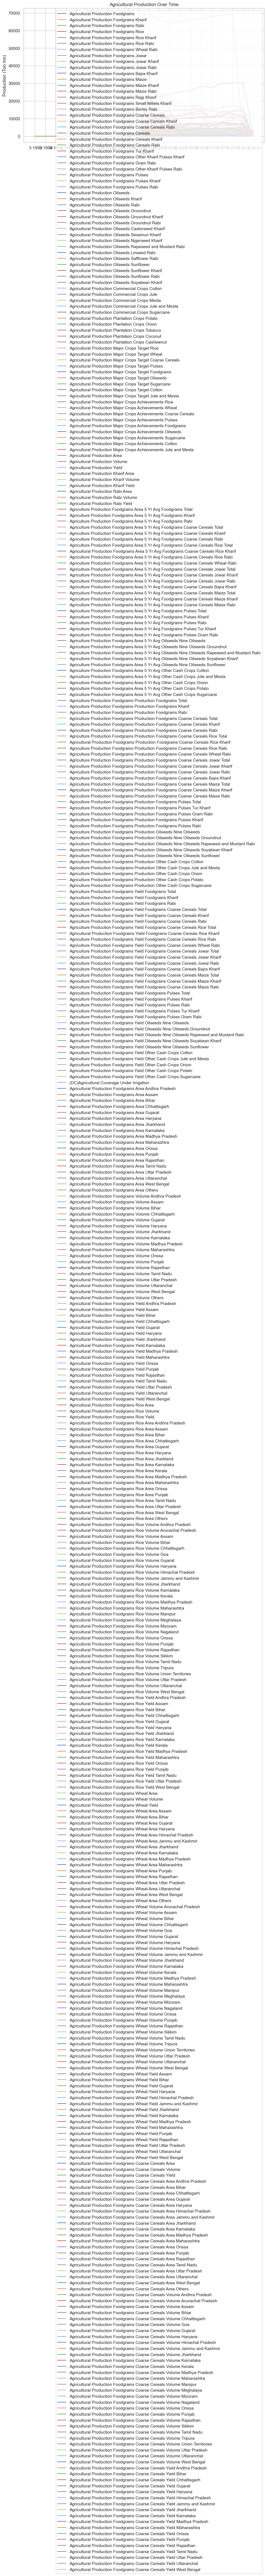

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of the plot
sns.set_style("whitegrid")

# Create the line plot
plt.figure(figsize=(10, 6))
for i, row in produce.iterrows():
    crop = row['Particulars']
    years = produce.columns[3:]
    production = row[3:]
    sns.lineplot(x=years, y=production, label=crop)

# Set the labels and title
plt.xlabel('Year')
plt.ylabel('Production (Ton mn)')
plt.title('Agricultural Production Over Time')

# Display the plot
plt.show()


In [60]:
%%capture
pip install graphviz

In [61]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Split the data into input features (X) and target variable (y)
X = data1[['Cost_A2_FL', 'Cost_C2', 'Cost_Production']]
y = data1['Yield']


In [62]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [64]:
# Train the models
model = LinearRegression()

model.fit(X_train, y_train)
prediction = model.predict(X_test)

# Evaluate the models
mse = mean_squared_error(y_test, prediction)
mae = mean_absolute_error(y_test, prediction)

evaluation = [mse, mae]

In [65]:
prediction

array([ -64.96034131,   34.55686752,  123.04927915,  700.49740915,
         42.15992508, -334.05723018, -142.59561777, -177.90064776,
         77.04658231,   26.2516218 ])